In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Defining path

path = r'/Users/lilia.verbenkogmail.com/04-08-2023 Instacart Basket Analysis'

In [4]:
# Importing customer_ords_prods_merged.pkl

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final.pkl'))

In [7]:
df.rename(columns = {'n_dependants' : 'number_of_dependants'}, inplace = True)

In [8]:
df.rename(columns = {'fam_status' : 'marital_status'}, inplace = True)

In [10]:
df.rename(columns = {'days_since_prior_order' : 'days_since_last_order'}, inplace = True)

In [11]:
df.rename(columns = {'order_dow' : 'orders_day_of_week'}, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   eval_set               object  
 3   order_number           int64   
 4   orders_day_of_week     int64   
 5   order_hour_of_day      int64   
 6   days_since_last_order  float64 
 7   product_id             int64   
 8   add_to_cart_order      int64   
 9   reordered              int64   
 10  product_name           object  
 11  aisle_id               int64   
 12  department_id          int64   
 13  prices                 float64 
 14  _merge                 category
 15  price_range_loc        object  
 16  busiest_day            object  
 17  busiest_days           object  
 18  order_hour_of_day_loc  object  
 19  busiest_hours          object  
 20  max_order              int64   
 21  loyalty_flag           object

In [13]:
crosstab = pd.crosstab(df['days_since_last_order'], df['order_number'], dropna = False)

In [14]:
crosstab.to_clipboard()

### 2. Consider any security implications that might exist for this new data. 
###     You’ll need to address any PII data in the data before continuing your analysis.

In [15]:
df = df.drop(columns = ['first_name','surname'])

### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. 
### Create a regional segmentation of the data. 
### You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [16]:
# Creating 4 arrays holding states in each of 4 regions

region=[]
for value in df['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [17]:
# Creating a new 'region' column

df['region'] = region

In [19]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,average_price,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,6.367797,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,6.367797,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,...,6.367797,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,6.367797,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,...,6.367797,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [20]:
# Checking frequency of 'region' column

df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [21]:
# Creating a crosstab for spending habits and frequency flag

crosstab_2 = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

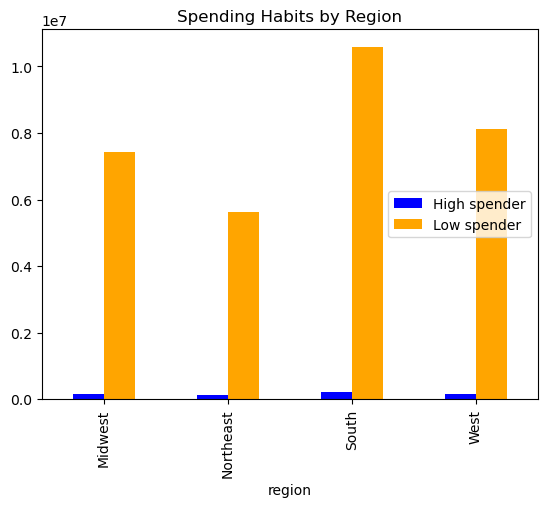

In [22]:
# Creating a bar chart 'Spending Habits by Region'

spending_habits_frequency_bar = crosstab_2.plot.bar(color = ['blue', 'orange'])
plt.title('Spending Habits by Region')
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.5))

Observations:
- The ratio is consistent across all regions

In [23]:
# Exporting the bar chart

spending_habits_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending Habits by Region.png'), bbox_inches='tight')

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. 
### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
### Make sure you export this sample.

In [24]:
# Creating a column 'high_activity_customer'

df.loc[df['max_order'] >= 5,'customer_activity'] = 'high_activity_customer'

In [25]:
# Creating a column 'low_activity_customer'

df.loc[df['max_order'] < 5,'customer_activity']= 'low_activity_customer'

In [26]:
# Check frequency

df['customer_activity'].value_counts(dropna = False)

high_activity_customer    30964564
low_activity_customer      1440295
Name: customer_activity, dtype: int64

In [27]:
# Creating a subset for low-activity customers and excluding it

df_low_activity_customer = df.loc[df['customer_activity'] == 'low_activity_customer']

In [28]:
# Exporting the subset as a pickle

df_low_activity_customer.to_pickle(os.path.join(path, '02 Data','Prepared Data','low_activity_customers.pkl'))

In [29]:
# Excluding the low_activity_customer subset from the dataframe

df = df.loc[df['customer_activity'] == 'high_activity_customer']

### 5.1 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. 
### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

#### AGE

In [146]:
# Creating a flag for the young aged group

df.loc[df['age'] < 40,'age_group'] = 'young'

In [31]:
# Creating a flag for the middle aged group

df.loc[df['age'] >= 40 & (df['age'] < 60), 'age_group'] = 'middle_aged'

In [32]:
# Creating a flag for the elderly aged group

df.loc[df['age'] >= 60,'age_group']='elderly'

In [147]:
# Checking the frequency of 'age_group' column

df['age_group'].value_counts()

young          10665110
elderly        10574504
middle_aged     9724950
Name: age_group, dtype: int64

In [149]:
# Creating a crosstab for age_group and spending_flag

crosstab_3 = pd.crosstab(df['age_group'], df['order_frequency_flag'], dropna = False)

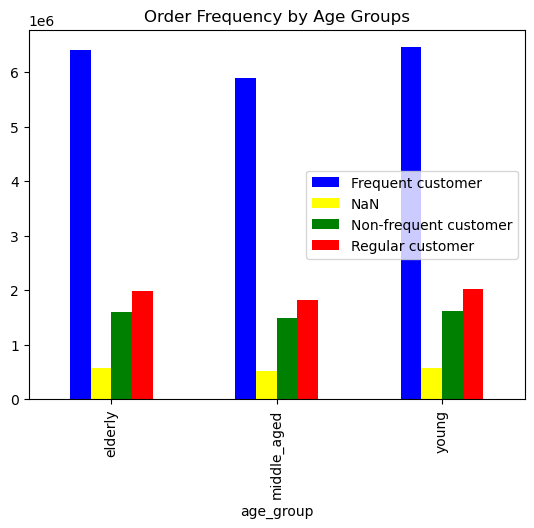

In [150]:
# Creating a bar chart 'Order Frequency by Age Groups'

order_frequency_age_groups_bar = crosstab_3.plot.bar(color = ['blue', 'yellow', 'green', 'red' ])
plt.title('Order Frequency by Age Groups')
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.5))

Observations:
- The ratio is consistent across all regions, except the middle aged group having slighly less frequent customers.

In [151]:
# Exporting the bar chart

order_frequency_age_groups_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Order Frequency by Age Groups.png'), bbox_inches='tight')

#### INCOME

In [152]:
# Checking income statistics

df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

Text(0.5, 0, 'Income')

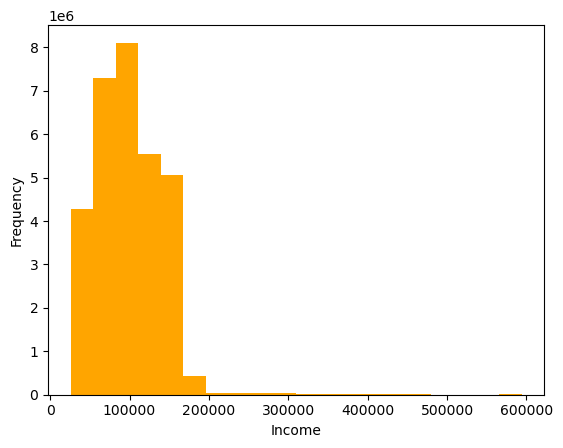

In [153]:
# Create a histogram to check the distribution

income_hist = df ['income'].plot.hist(color = 'orange', bins = 20)
plt.xlabel("Income")

In [154]:
# Exporting the histogram

income_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_hist.png'),bbox_inches='tight')

I have divided income groups according to  Pew Research Center income brackets and their categorization into low income, middle income, and high income:
- Low Income: Up to 48,500.
- Middle Income: 48,500 to 145,500.
- High Income: 145,500 and above.


In [155]:
# Creating a flag for the 'low_income' group

df.loc[(df['income'] < 48500), 'income_groups'] = 'low_income'

In [156]:
# Create an income flag for the three categories

df.loc[(df['income'] >= 48500 ) & (df['income'] < 145500), 'income_groups'] = 'middle_income'

In [157]:
# Creating a flag for the 'high_income' group

df.loc[(df['income'] >= 145500), 'income_groups'] = 'high_income'

In [158]:
# Checking the frequency

df['income_groups'].value_counts()

middle_income    23128350
high_income       4690090
low_income        3146124
Name: income_groups, dtype: int64

### DEPARTMENT

In [159]:
# Importing the department dataset

df_depart = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'),index_col = False)

In [160]:
df_depart

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [161]:
# Renaming the "Unnamed: 0" column

df_depart.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [162]:
df_depart

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [163]:
# Checking data type department_id

df_depart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [164]:
# Changing the data type of 'department_id'

df_depart['department_id']=df_depart['department_id'].astype('int8')

In [165]:
# Merging the main dataframe with df_depart 

df = df.merge(df_depart, on = 'department_id')

In [166]:
# Checking the head() 

df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,income,region,customer_activity,age_group,income_groups,department_y,customer_snacks,customer_meat_seafood,family_status_flag,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,40423,South,high_activity_customer,young,low_income,beverages,snack_buyer,meat_seafood_non_buyer,Married WITH Dependants,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,40423,South,high_activity_customer,young,low_income,beverages,snack_buyer,meat_seafood_non_buyer,Married WITH Dependants,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,...,40423,South,high_activity_customer,young,low_income,beverages,snack_buyer,meat_seafood_non_buyer,Married WITH Dependants,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,40423,South,high_activity_customer,young,low_income,beverages,snack_buyer,meat_seafood_non_buyer,Married WITH Dependants,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,...,40423,South,high_activity_customer,young,low_income,beverages,snack_buyer,meat_seafood_non_buyer,Married WITH Dependants,beverages


Text(0.5, 1.0, 'Orders by Department')

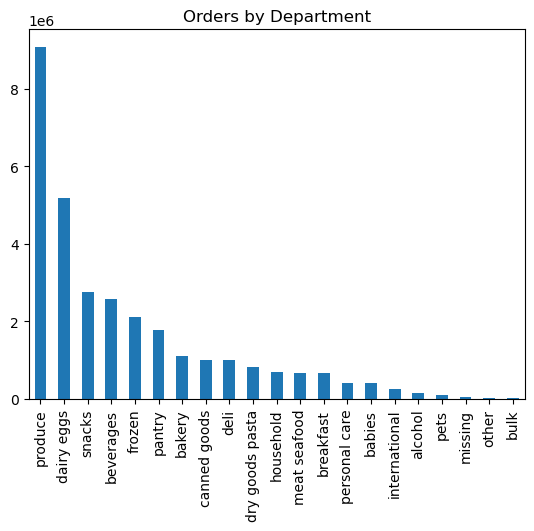

In [167]:
# Creating a bar chart

department_bar = df['department_y'].value_counts().plot.bar()
plt.title('Orders by Department')

In [168]:
# Exporting the orders_by_department bar chart

department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_by_department_.png'),bbox_inches='tight')

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [169]:
crosstab_5 = df.groupby('department_y').agg({'order_id':['count'],'days_since_last_order':['mean'],  'prices':['mean']})

In [170]:
crosstab_5

,order_id,days_since_last_order,prices
,count,mean,mean
department_y,,,
alcohol,144627,10.006658,8.150699
babies,410392,9.780844,7.634399
bakery,1120828,10.808401,7.857482
beverages,2571901,10.768469,7.682556
breakfast,670850,11.001313,8.031647
bulk,33451,9.880211,8.346919
canned goods,1012074,11.316872,7.546660
dairy eggs,5177182,10.709201,8.336372


In [171]:
crosstab_5.to_clipboard()

#### Making 2 customer profiles of the two departments with the lowest and the highest average prices

##### Snacks

In [172]:
# Creating a flag to for snack_buyers and snacks_non-buyers

df.loc[df['department_id'] == 19, 'customer_snacks'] = 'snack_buyer'

df.loc[df['department_id'] != 19, 'customer_snacks'] = 'snack_non_buyer'

In [173]:
# Identifing snack_buyers

snack = df.loc[df['customer_snacks'] == 'snack_buyer', 'user_id'].unique()

In [174]:
# Updating the "user_id" column

df.loc[df['user_id'].isin(snack), 'customer_snacks'] = 'snack_buyer'

In [175]:
# Checking the frequency 

df['customer_snacks'].value_counts()

snack_buyer        29852553
snack_non_buyer     1112011
Name: customer_snacks, dtype: int64

##### Meat Seafood 

In [176]:
# Creating a flag to for meat_seafood_buyers and meat_seafood_non-buyers

df.loc[df['department_id'] == 12, 'customer_meat_seafood'] = 'meat_seafood_buyer'

df.loc[df['department_id'] != 12, 'customer_meat_seafood'] = 'meat_seafood_non_buyer'

In [177]:
# Identifing meat_seafood_buyer

meat_seafood = df.loc[df['customer_meat_seafood'] == 'meat_seafood_buyer', 'user_id'].unique()

In [178]:
# Updating the "user_id" column

df.loc[df['user_id'].isin(meat_seafood), 'customer_meat_seafood'] = 'meat_seafood_buyer'

In [179]:
# Checking the frequency 

df['customer_meat_seafood'].value_counts()

meat_seafood_buyer        23065332
meat_seafood_non_buyer     7899232
Name: customer_meat_seafood, dtype: int64

### NUMBER OF DEPENDENTS

In [180]:
# Check the frequency of the Family Status column

df['marital_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

In [181]:
# Creating a flag for 'Single with NO Dependants' customers

df.loc[(df['marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df['number_of_dependants']==0), 'family_status_flag'] = 'Single with NO Dependants'

In [182]:
# Creating a flag for 'Single with NO Dependants' customers

df.loc[(df['marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df['number_of_dependants'] > 1), 'family_status_flag'] = 'Single WITH Dependants'

In [183]:
# Creating a flag for 'Married with NO Dependants' customers

df.loc[(df['marital_status'] == 'married') & (df['number_of_dependants'] == 1), 'family_status_flag'] = 'Married with NO Dependants'

In [184]:
# Creating a flag for 'Married WITH Dependants' customers

df.loc[(df['marital_status'] == 'married') & (df['number_of_dependants'] > 1), 'family_status_flag'] = 'Married WITH Dependants'

In [185]:
# Check the frequency

df['family_status_flag'].value_counts()

Married WITH Dependants       14532650
Single with NO Dependants      7739681
Married with NO Dependants     7211061
Single WITH Dependants          973127
Name: family_status_flag, dtype: int64

### Use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 
### (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### AGE

Age Groups Orders by Days of Week

In [186]:
# Creating a croostab for orders_day_of_week and age groups

crosstab_6 = pd.crosstab(df['orders_day_of_week'],df['age_group'],dropna=False)

In [187]:
crosstab_6

age_group,elderly,middle_aged,young
orders_day_of_week,,,
0,2015716,1851537,2041357
1,1834354,1695579,1881753
2,1374494,1273800,1376412
3,1261177,1148354,1260004
4,1236367,1135463,1253164
5,1379968,1262984,1390777
6,1472428,1357233,1461643


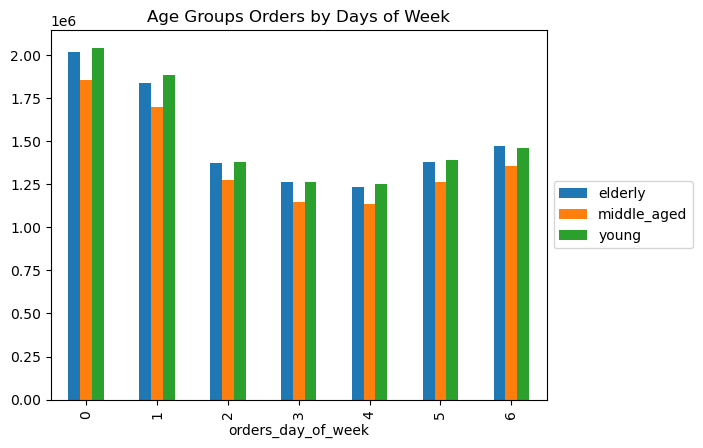

In [188]:
# Creating a bar chart for orders_dow and age groups

age_group_order_dow_bar = crosstab_6.plot.bar()
plt.title('Age Groups Orders by Days of Week')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [189]:
# Exporting the bar chart

age_group_order_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_dow_age_groups.png'),bbox_inches='tight')

Age Groups Orders by Hours of Day

In [190]:
# Creating a crosstab for orders_hour_of_day and age groups 

crosstab_7 = pd.crosstab(df['order_hour_of_day'], df['age_group'],dropna = False)

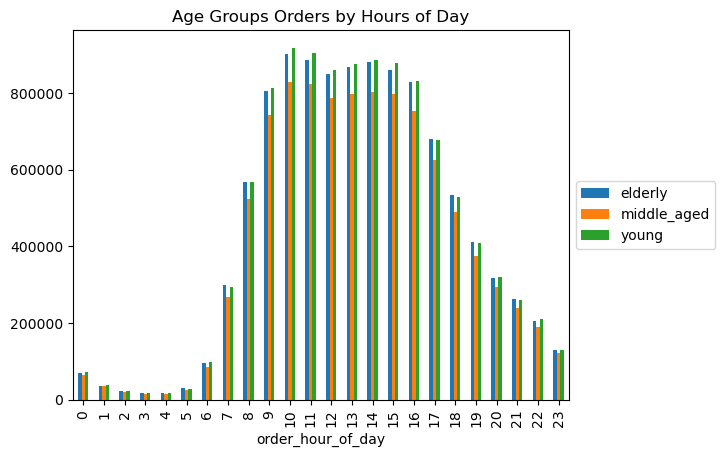

In [191]:
# Creating a bar chart for orders_day_of_week and age groups 

age_group_order_hour_day_bar = crosstab_7.plot.bar()
plt.title('Age Groups Orders by Hours of Day')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [192]:
# Exporting the bar chart

age_group_order_hour_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_day_age_group_bar.png'),bbox_inches='tight')

### INCOME

Income Group Orders by Days of Week

In [193]:
# Creating a croostab for orders_day_of_week and income groups

crosstab_8 = pd.crosstab(df['orders_day_of_week'],df['income_groups'],dropna=False)

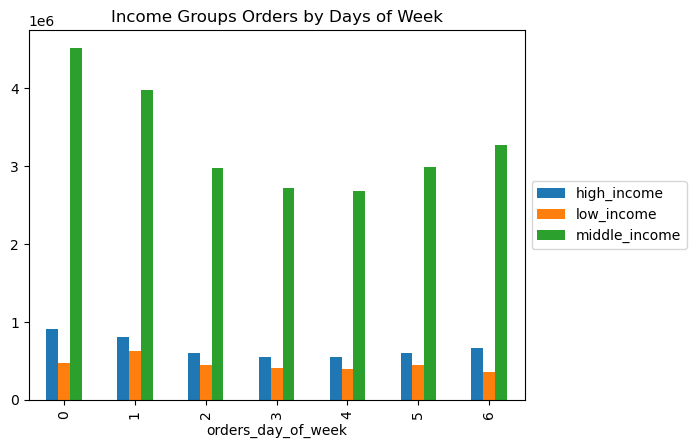

In [194]:
# Creating a bar chart for orders_dow and income groups

income_group_order_dow_bar = crosstab_8.plot.bar()
plt.title('Income Groups Orders by Days of Week')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [195]:
# Exporting the bar chart

income_group_order_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_order_dow_bar.png'),bbox_inches='tight')

Income Group Orders by Hours of Day

In [196]:
# Creating a crosstab for orders_hour_of_day and income groups 

crosstab_9 = pd.crosstab(df['order_hour_of_day'], df['income_groups'],dropna = False)

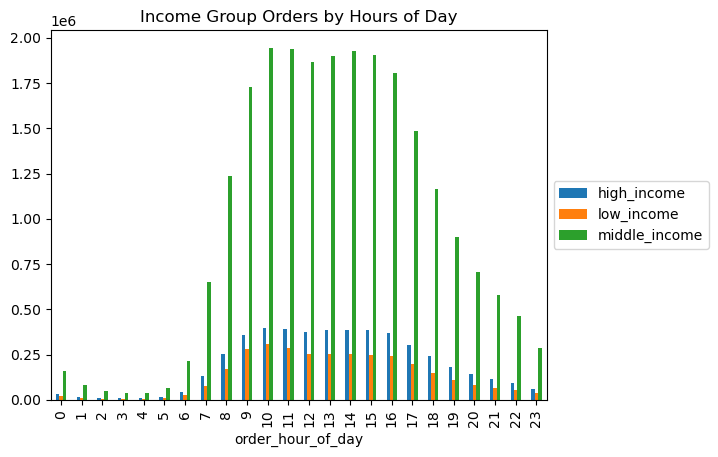

In [197]:
# Creating a bar chart for orders_day_of_week and income_groups

income_group_order_hour_day_bar = crosstab_9.plot.bar()
plt.title('Income Group Orders by Hours of Day')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [198]:
# Exporting the bar chart

income_group_order_hour_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_order_hour_day_bar.png'),bbox_inches='tight')

### NUMBER OF DEPENDANTS

Number of Dependants Orders by Days of Week

In [199]:
# Creating a croostab for orders_dow and number of dependants

crosstab_10 = pd.crosstab(df['orders_day_of_week'],df['family_status_flag'],dropna=False)

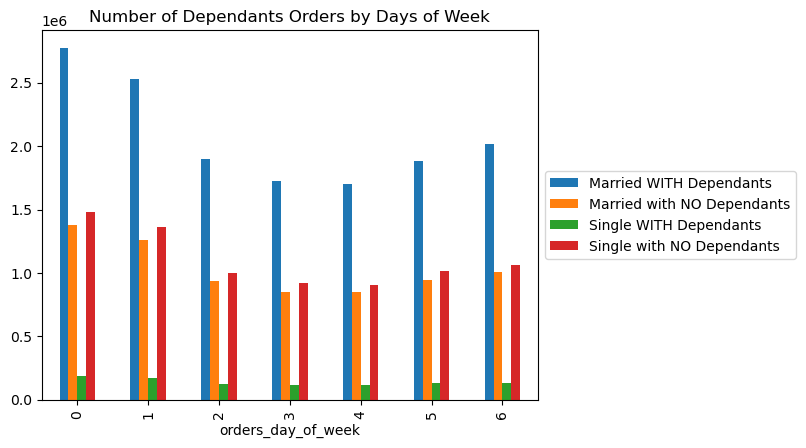

In [200]:
# Creating a bar chart for orders_dow and number of dependants

family_status_flag_order_dow_bar = crosstab_10.plot.bar()
plt.title('Number of Dependants Orders by Days of Week')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [201]:
# Exporting the bar chart

family_status_flag_order_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_flag_order_dow_bar.png'),bbox_inches='tight')

Income Group Orders by Hours of Day

In [202]:
# Creating a croostab for order_hour_of_day and number of dependants

crosstab_11 = pd.crosstab(df['order_hour_of_day'],df['family_status_flag'],dropna=False)

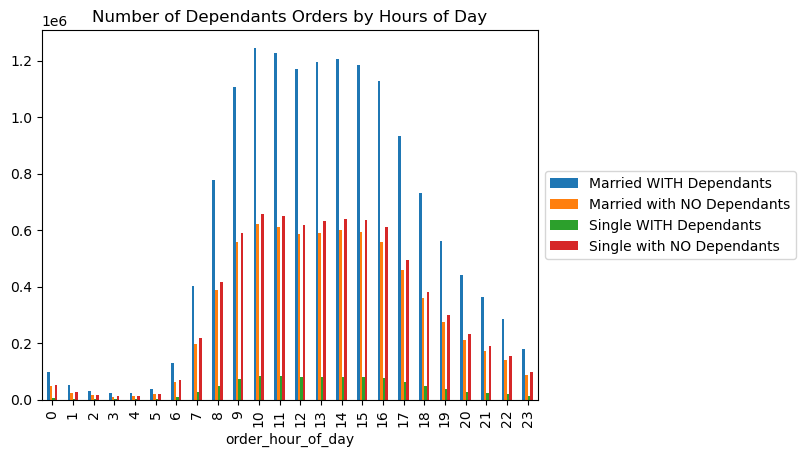

In [203]:
# Creating a bar chart for order_hour_of_day and number of dependants

family_status_flag_order_hour_of_day_bar = crosstab_11.plot.bar()
plt.title('Number of Dependants Orders by Hours of Day')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [204]:
# Exporting the bar chart

family_status_flag_order_hour_of_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_flag_order_hour_of_day_bar.png'),bbox_inches='tight')

### Create an appropriate visualization to show the distribution of profiles.

### AGE

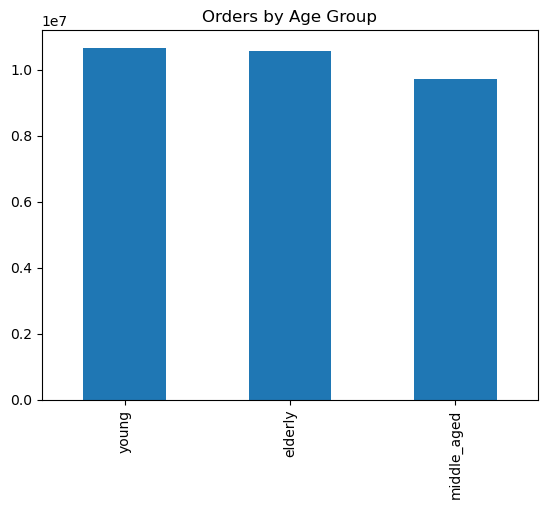

In [205]:
# Creating a bar chart

age_bar = df['age_group'].value_counts().plot.bar()
plt.title('Orders by Age Group')
plt.show()

In [206]:
# Exporting the bar chart

age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_by_age_bar.png'),bbox_inches='tight')

### INCOME 

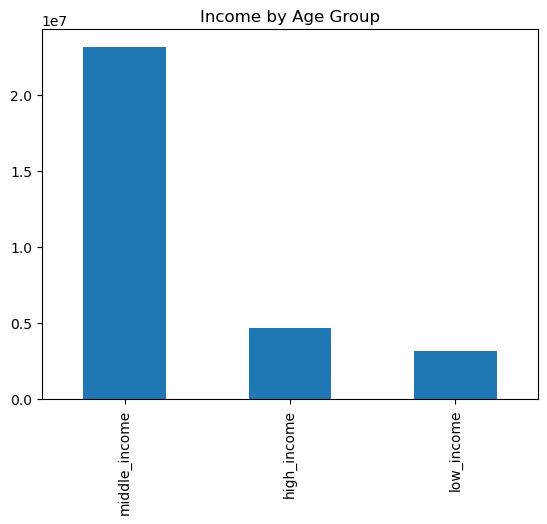

In [207]:
# Creating a bar chart

income_bar = df['income_groups'].value_counts().plot.bar()
plt.title('Income by Age Group')
plt.show()

In [208]:
# Exporting the bar chart

age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_by_age_bar.png'),bbox_inches='tight')

### DEPARTMENT

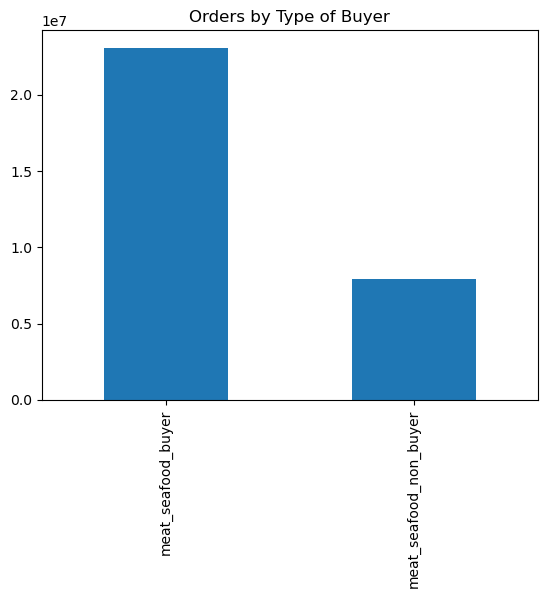

In [209]:
# Creating a bar chart for meat and seafood buyers 

meat_seafood_buyer_bar = df['customer_meat_seafood'].value_counts().plot.bar()
plt.title('Orders by Type of Buyer')
plt.show()

In [210]:
# Exporting the bar chart

meat_seafood_buyer_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'meat_seafood_buyer_bar.png'),bbox_inches='tight')

### NUMBER OF DEPENDANTS

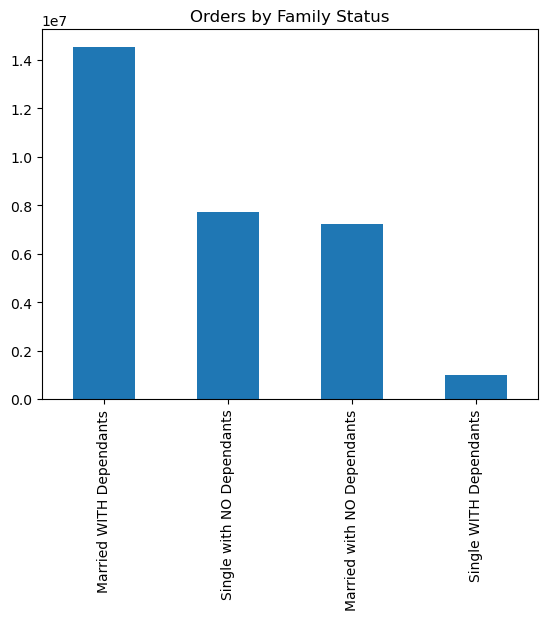

In [211]:
# Creating a bar chart

family_status_bar = df['family_status_flag'].value_counts().plot.bar()
plt.title('Orders by Family Status')
plt.show()

In [212]:
# Exporting the bar chart

family_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_bar.png'),bbox_inches='tight')

### REGION

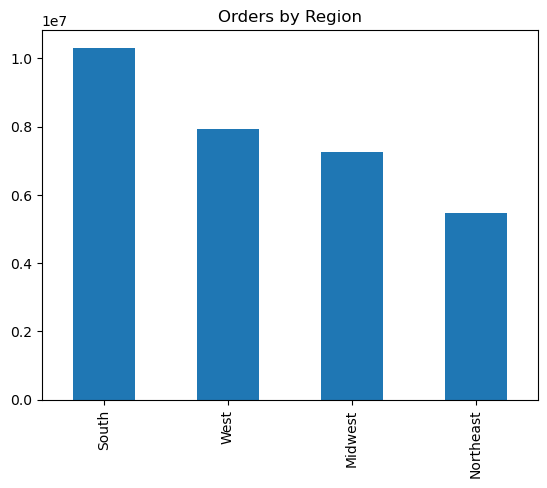

In [213]:
# Creating a bar chart

region_bar = df['region'].value_counts().plot.bar()
plt.title('Orders by Region')
plt.show()

In [214]:
# Exporting the bar chart

region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_bar.png'),bbox_inches='tight')

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### AGE


In [215]:
# Aggregate the max, mean and min variables on a customer-profile level for usage frequency and expenditure. 

crosstab_age = df.groupby('age_group').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [216]:
crosstab_age

order_id days_since_last_order                  prices            \
                count                   min       mean   max    min      mean   
age_group                                                                       
elderly      10574504                   0.0  10.800665  30.0    1.0  7.795446   
middle_aged   9724950                   0.0  10.819702  30.0    1.0  7.791641   
young        10665110                   0.0  10.811278  30.0    1.0  7.784818   

                   
              max  
age_group          
elderly      25.0  
middle_aged  25.0  
young        25.0

In [217]:
crosstab_age.to_clipboard()

### INCOME

In [218]:
# Aggregate the max, mean and min variables on a customer-profile level for usage frequency and expenditure. 

crosstab_income = df.groupby('income_groups').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [219]:
crosstab_income

order_id days_since_last_order                  prices  \
                  count                   min       mean   max    min   
income_groups                                                           
high_income     4690090                   0.0  10.711185  30.0    1.0   
low_income      3146124                   0.0  11.194266  30.0    1.0   
middle_income  23128350                   0.0  10.778441  30.0    1.0   

                               
                   mean   max  
income_groups                  
high_income    7.943054  25.0  
low_income     6.682987  25.0  
middle_income  7.910370  25.0

In [220]:
crosstab_income.to_clipboard()

### DEPARTMENT

In [221]:
# Aggregate the max, mean and min variables on a customer-profile level for usage frequency and expenditure. 

crosstab_department = df.groupby('department_y').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [222]:
crosstab_department

order_id days_since_last_order                  prices  \
                   count                   min       mean   max    min   
department_y                                                             
alcohol           144627                   0.0  10.006658  30.0    1.0   
babies            410392                   0.0   9.780844  30.0    1.0   
bakery           1120828                   0.0  10.808401  30.0    1.0   
beverages        2571901                   0.0  10.768469  30.0    1.0   
breakfast         670850                   0.0  11.001313  30.0    1.0   
bulk               33451                   0.0   9.880211  30.0    1.4   
canned goods     1012074                   0.0  11.316872  30.0    1.0   
dairy eggs       5177182                   0.0  10.709201  30.0    1.0   
deli             1003834                   0.0  11.051389  30.0    1.0   
dry goods pasta   822136                   0.0  11.440362  30.0    1.0   
frozen           2121731                   0.0  11.413880  30.0    1.0   
household         699857                   0.0  11.649305  30.0    1.0   
international     255991                   0.0  10.963731  30.0    1.0   
meat seafood      674781                   0.0  11.123647  30.0    8.0   
missing            64768                   0.0   9.869551  30.0    1.0   
other              34411                   0.0  10.624647  30.0    1.1   
pantry           1782705                   0.0  10.835976  30.0    1.0   
personal care     424306                   0.0  11.256240  30.0    1.0   
pets               93060                   0.0  11.593531  30.0    1.0   
produce          9079273                   0.0  10.574119  30.0    1.0   
snacks           2766406                   0.0  10.671110  30.0    1.6   

                                  
                      mean   max  
department_y                      
alcohol           8.150699  15.0  
babies            7.634399  15.0  
bakery            7.857482  15.0  
beverages         7.682556  15.0  
breakfast         8.031647  14.9  
bulk              8.346919  14.1  
canned goods      7.546660  15.0  
dairy eggs        8.336372  15.0  
deli              7.783347  15.0  
dry goods pasta   7.349370  15.0  
frozen            7.733725  15.0  
household         7.379951  15.0  
international     7.678797  15.0  
meat seafood     16.300034  25.0  
missing           8.660655  15.0  
other             6.961995  15.0  
pantry            8.014482  20.0  
personal care     7.998744  15.0  
pets              7.887489  15.0  
produce           7.980348  15.0  
snacks            4.275555   7.0

In [223]:
crosstab_department.to_clipboard()

### NUMBER OF DEPENDANTS

In [224]:
# Aggregate the max, mean and min variables on a customer-profile level for usage frequency and expenditure. 

crosstab_family_status_flag = df.groupby('family_status_flag').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [225]:
crosstab_family_status_flag

order_id days_since_last_order                   \
                               count                   min       mean   max   
family_status_flag                                                            
Married WITH Dependants     14532650                   0.0  10.823959  30.0   
Married with NO Dependants   7211061                   0.0  10.814660  30.0   
Single WITH Dependants        973127                   0.0  10.818080  30.0   
Single with NO Dependants    7739681                   0.0  10.791951  30.0   

                           prices                  
                              min      mean   max  
family_status_flag                                 
Married WITH Dependants       1.0  7.787643  25.0  
Married with NO Dependants    1.0  7.795589  25.0  
Single WITH Dependants        1.0  7.800673  25.0  
Single with NO Dependants     1.0  7.789550  25.0

In [226]:
crosstab_family_status_flag.to_clipboard()

### REGION

In [227]:
# Aggregate the max, mean and min variables on a customer-profile level for usage frequency and expenditure. 

crosstab_region = df.groupby('region').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [228]:
crosstab_region

order_id days_since_last_order                  prices            \
              count                   min       mean   max    min      mean   
region                                                                        
Midwest     7261513                   0.0  10.892736  30.0    1.0  7.792318   
Northeast   5464685                   0.0  10.774220  30.0    1.0  7.781441   
South      10311139                   0.0  10.814227  30.0    1.0  7.794439   
West        7927227                   0.0  10.754622  30.0    1.0  7.790308   

                 
            max  
region           
Midwest    25.0  
Northeast  25.0  
South      25.0  
West       25.0

In [229]:
crosstab_age.to_clipboard()

### LOYALTY FLAG

In [230]:
# Aggregating the max, mean and min variables on a customer-profile level for usage frequency and expenditure. 

crosstab_loyalty_flag = df.groupby('loyalty_flag').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [231]:
crosstab_loyalty_flag

order_id days_since_last_order                  prices  \
                     count                   min       mean   max    min   
loyalty_flag                                                               
Loyal customer    10284093                   0.0   6.026656  30.0    1.0   
New customer       4803695                   0.0  17.598691  30.0    1.0   
Regular customer  15876776                   0.0  12.155135  30.0    1.0   

                                  
                      mean   max  
loyalty_flag                      
Loyal customer    7.773575  25.0  
New customer      7.801665  25.0  
Regular customer  7.798262  25.0

In [232]:
crosstab_loyalty_flag.to_clipboard()

### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### Age and  loyalty_flag


In [233]:
# Creating a crosstab

age_loyalty = pd.crosstab(df['loyalty_flag'], df['age_group'],dropna=False)

In [234]:
age_loyalty = age_loyalty.sort_values(by= ['young'], ascending=True)

In [235]:
age_loyalty 

age_group,elderly,middle_aged,young
loyalty_flag,,,
New customer,1649975,1513986,1639734
Loyal customer,3514773,3249934,3519386
Regular customer,5409756,4961030,5505990


In [236]:
age_loyalty.to_clipboard()

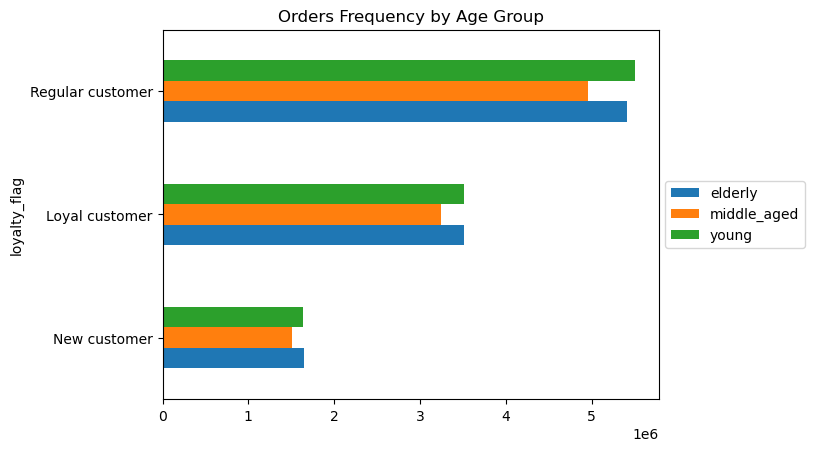

In [237]:
# Creating a bar chart

age_loyalty = age_loyalty.plot.barh()
plt.title('Orders Frequency by Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [238]:
# Exporting the bar chart

age_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_loyalty_viz.png'),bbox_inches='tight')

#### Region and  loyalty_flag

In [239]:
# Creating a crosstab

region_loyalty = pd.crosstab(df['loyalty_flag'], df['region'],dropna=False)

In [240]:
region_loyalty = region_loyalty.sort_values(by=['South'], ascending=True)

In [241]:
region_loyalty

region,Midwest,Northeast,South,West
loyalty_flag,,,,
New customer,1136761,842156,1593664,1231114
Loyal customer,2373774,1841785,3405844,2662690
Regular customer,3750978,2780744,5311631,4033423


In [242]:
region_loyalty.to_clipboard()

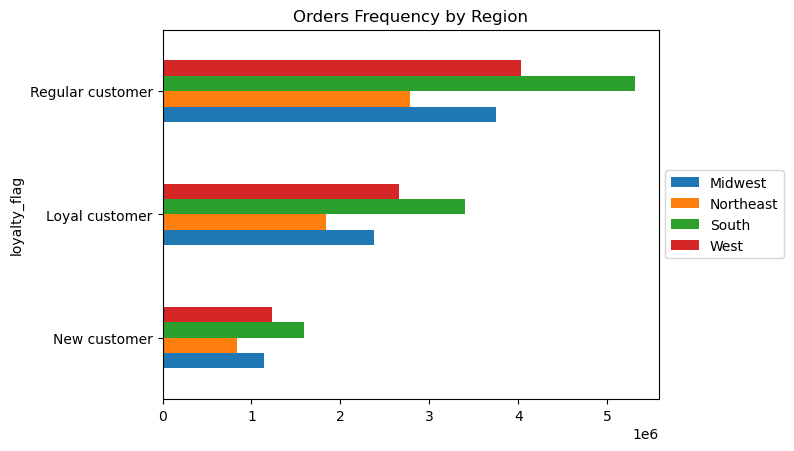

In [243]:
# Creating a bar chart

region_loyalty = region_loyalty.plot.barh()
plt.title('Orders Frequency by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [244]:
# Exporting the bar chart

region_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_loyalty_bar.png'),bbox_inches='tight')

#### Regions and Departments

In [245]:
# Creating a crosstab

region_depts = pd.crosstab(df['department_y'], df['region'],dropna=False)

In [246]:
region_depts = region_depts.sort_values(by=['South'], ascending=True)

In [247]:
region_depts

region,Midwest,Northeast,South,West
department_y,,,,
bulk,7929,5599,11180,8743
other,7983,6268,11579,8581
missing,15563,11512,21787,15906
pets,21358,17734,29909,24059
alcohol,34043,25017,48813,36754
international,60666,44678,84649,65998
babies,95741,72712,139511,102428
personal care,100398,74765,142496,106647
breakfast,156155,117904,223172,173619


In [248]:
region_depts.to_clipboard()

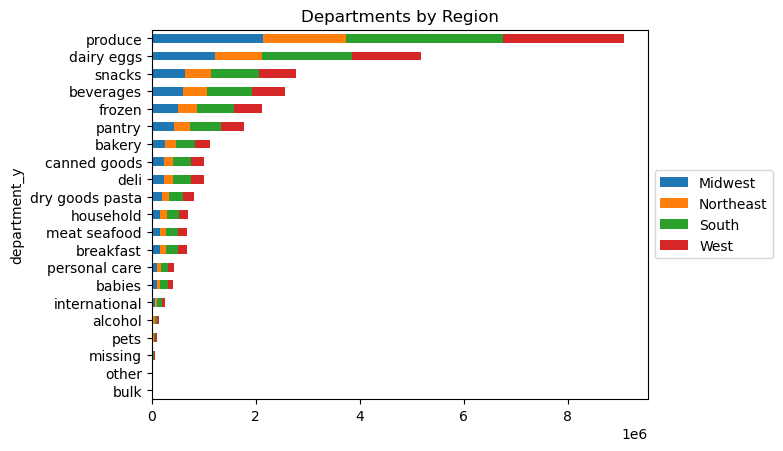

In [249]:
# Creating a stacked bar chart

region_depts = region_depts.plot.barh(stacked = True)
plt.title('Departments by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [250]:
# Exporting the bar chart

region_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_departments_bar.png'),bbox_inches='tight')

#### Income and  loyalty_flag

In [251]:
# Creating a crosstab

income_loyalty = pd.crosstab(df['loyalty_flag'], df['income_groups'],dropna=False)

In [252]:
income_loyalty = income_loyalty.sort_values(by=['high_income'], ascending=True)

In [253]:
income_loyalty

income_groups,high_income,low_income,middle_income
loyalty_flag,,,
New customer,700332,589972,3513391
Loyal customer,1570525,963399,7750169
Regular customer,2419233,1592753,11864790


In [254]:
income_loyalty.to_clipboard()

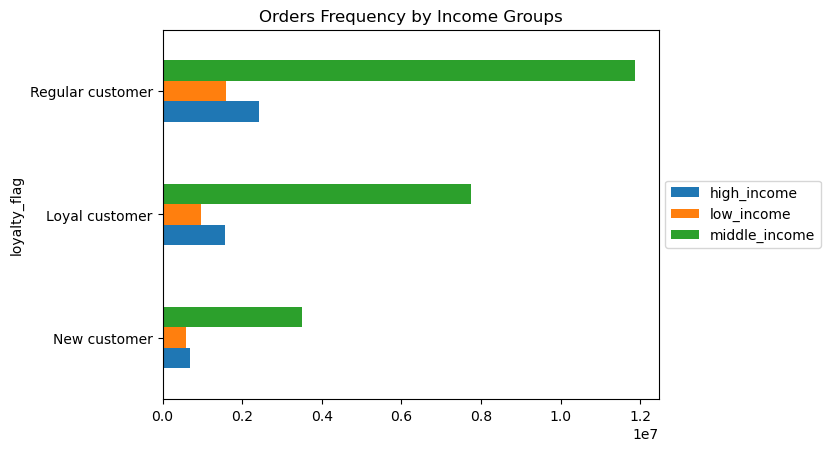

In [255]:
# Creating a bar chart

income_loyalty = income_loyalty.plot.barh()
plt.title('Orders Frequency by Income Groups')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [256]:
# Exporting the bar chart

income_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_loyalty_bar.png'),bbox_inches='tight')

#### Number of Dependents and loyalty_flag

In [257]:
# Creating a crosstab

family_status_loyalty = pd.crosstab(df['loyalty_flag'], df['family_status_flag'],dropna=False)

In [258]:
family_status_loyalty = family_status_loyalty.sort_values(by=['Single with NO Dependants'], ascending=True)

In [259]:
family_status_loyalty

family_status_flag,Married WITH Dependants,Married with NO Dependants,Single WITH Dependants,Single with NO Dependants
loyalty_flag,,,,
New customer,2244509,1136142,148054,1201265
Loyal customer,4816927,2385573,319353,2588844
Regular customer,7471214,3689346,505720,3949572


In [260]:
family_status_loyalty.to_clipboard()

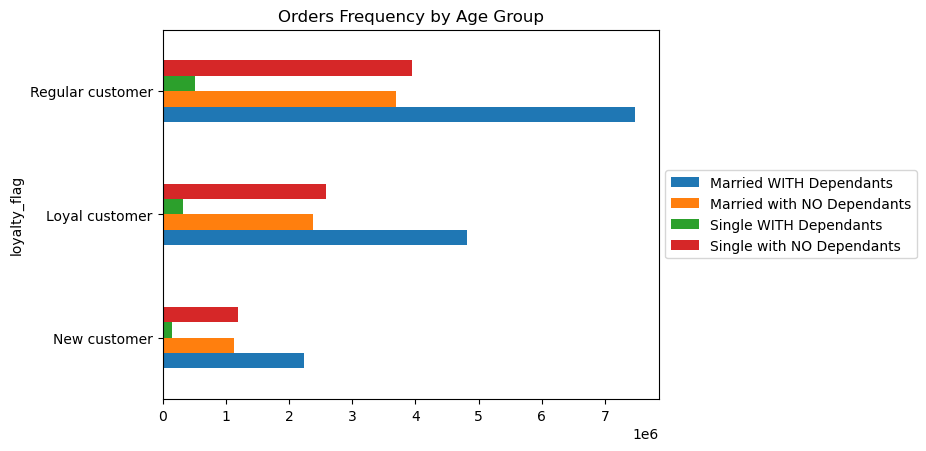

In [261]:
# Creating a bar chart

family_status_loyalty = family_status_loyalty.plot.barh()
plt.title('Orders Frequency by Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [262]:
# Exporting the bar chart

family_status_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_loyalty_bar.png'),bbox_inches='tight')

#### Age and Meat Seafood Buyers

In [263]:
# Creating a crosstab

age_meat_seafood = pd.crosstab(df['age_group'], df['customer_meat_seafood'],dropna=False)

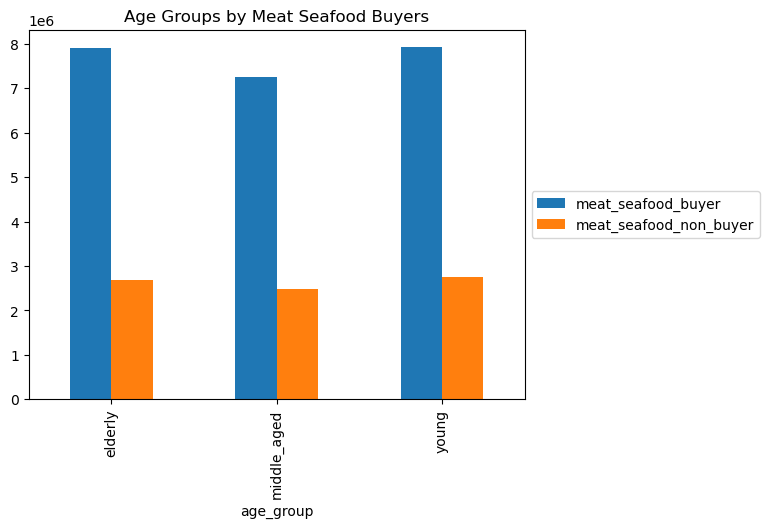

In [264]:
age_meat_seafood = age_meat_seafood.plot.bar()
plt.title('Age Groups by Meat Seafood Buyers')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [265]:
# Exporting the bar chart

age_meat_seafood.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups_meat_seafood_bar.png'),bbox_inches='tight')

#### Income and Meat Seafood Buyers

In [266]:
# Creating a crosstab

income_meat_seafood = pd.crosstab(df['income_groups'], df['customer_meat_seafood'],dropna=False)

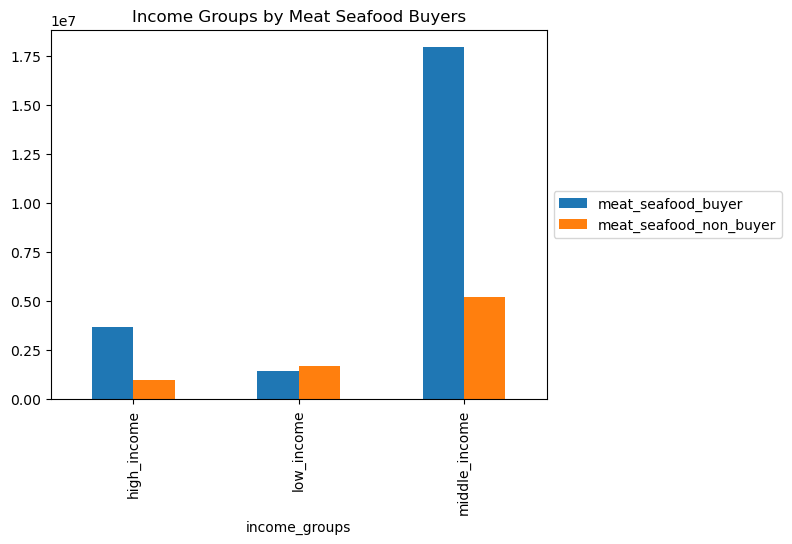

In [267]:
# Creating a bar

income_meat_seafood = income_meat_seafood.plot.bar()
plt.title('Income Groups by Meat Seafood Buyers')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [268]:
# Exporting the bar chart

income_meat_seafood.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_groups_meat_seafood_bar.png'),bbox_inches='tight')

#### Number of Dependants and Meat Seafood Buyers

In [269]:
# Creating a crosstab

family_status_meat_seafood = pd.crosstab(df['family_status_flag'], df['customer_meat_seafood'],dropna=False)

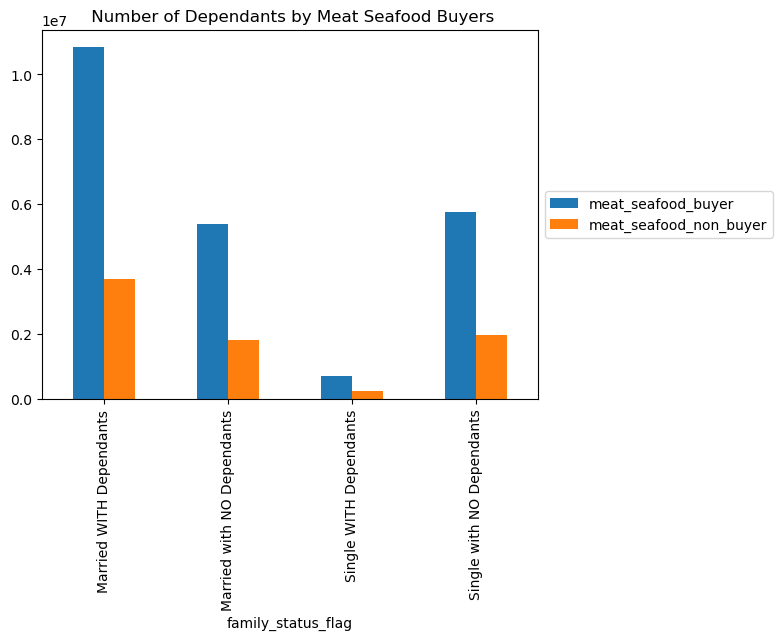

In [270]:
# Creating a bar chart

family_status_meat_seafood = family_status_meat_seafood.plot.bar()
plt.title(' Number of Dependants by Meat Seafood Buyers')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [271]:
# Exporting the bar chart

family_status_meat_seafood.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_meat_seafood_bar.png'),bbox_inches='tight')

#### Regions and Meat Seafood Buyers

In [272]:
# Creating a crosstab

region_meat_seafood = pd.crosstab(df['region'], df['customer_meat_seafood'],dropna=False)

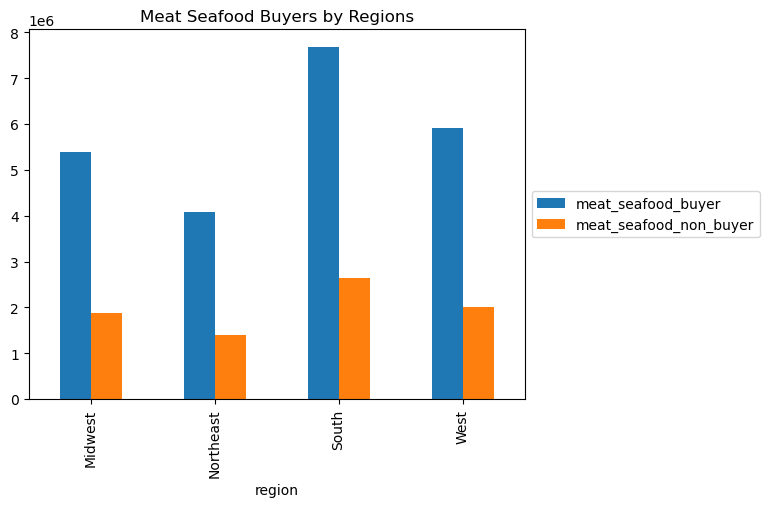

In [273]:
# Creating a bar chart

region_meat_seafood = region_meat_seafood.plot.bar()
plt.title('Meat Seafood Buyers by Regions')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [274]:
# Exporting the bar chart

region_meat_seafood.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_meat_seafood_bar.png'),bbox_inches='tight')

#### Age and  Snack Buyers

In [275]:
# Creating a crosstab

age_customer_snacks = pd.crosstab(df['age_group'], df['customer_snacks'],dropna=False)

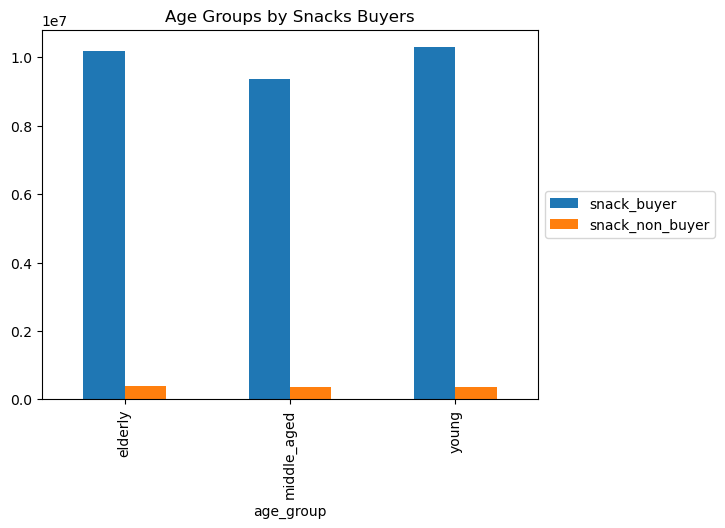

In [276]:
# Creating a bar chart

age_customer_snacks = age_customer_snacks.plot.bar()
plt.title('Age Groups by Snacks Buyers')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [277]:
# Exporting the bar chart

age_customer_snacks.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_customer_snacks_bar.png'),bbox_inches='tight')

#### Income and  Snack Buyers

In [278]:
# Creating a crosstab

income_customer_snacks = pd.crosstab(df['income_groups'], df['customer_snacks'],dropna=False)

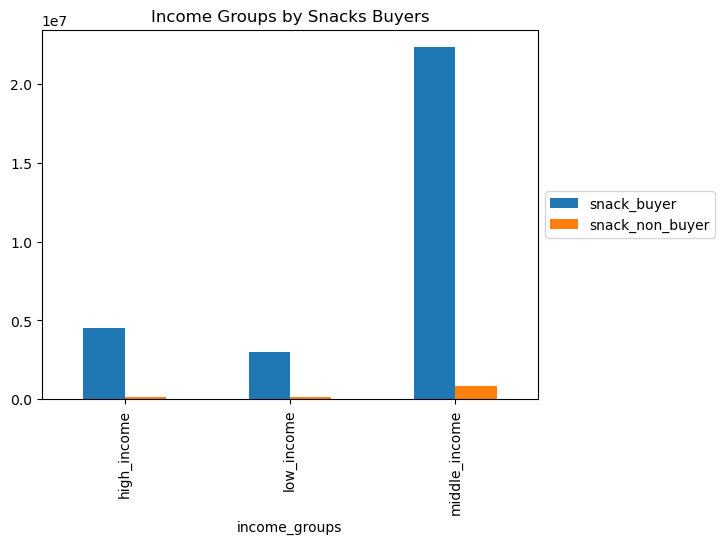

In [279]:
# Creating a bar chart

income_customer_snacks = income_customer_snacks.plot.bar()
plt.title('Income Groups by Snacks Buyers')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [280]:
# Exporting the bar chart

income_customer_snacks.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_customer_snacks_bar.png'),bbox_inches='tight')

#### Number of Dependants and  Snack Buyers

In [281]:
# Creating a crosstab

family_status_snacks = pd.crosstab(df['family_status_flag'], df['customer_snacks'],dropna=False)

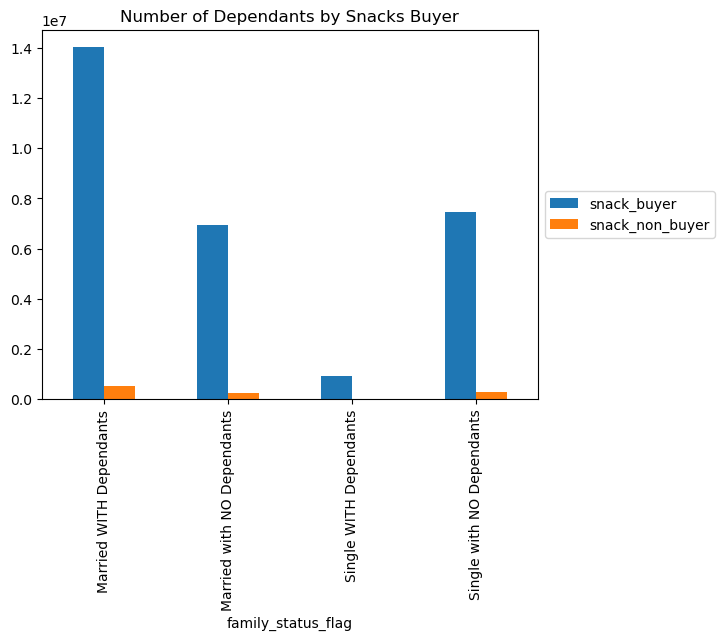

In [282]:
# Creating a bar chart

family_status_snacks = family_status_snacks.plot.bar()
plt.title('Number of Dependants by Snacks Buyer')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [283]:
# Exporting the bar chart

family_status_snacks.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ffamily_status_snacks_bar.png'),bbox_inches='tight')

#### Region and  Snack Buyers

In [284]:
# Creating a crosstab

region_snacks = pd.crosstab(df['region'], df['customer_snacks'],dropna=False)

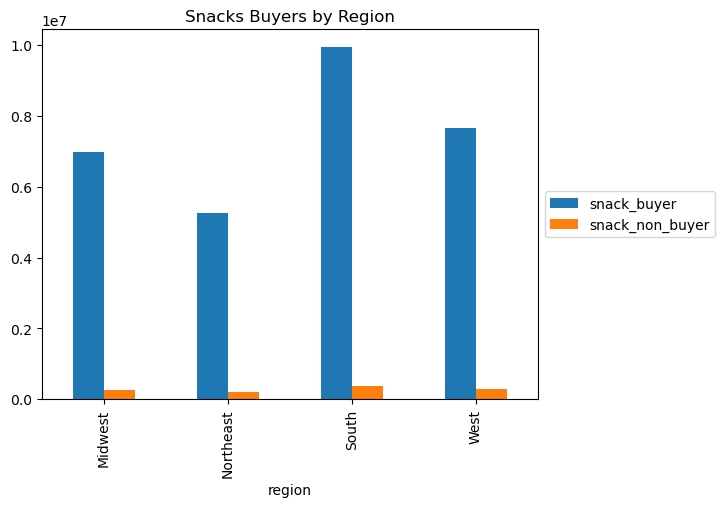

In [285]:
# Creating a bar chart

region_snacks = region_snacks.plot.bar()
plt.title('Snacks Buyers by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [286]:
# Exporting the bar chart

region_snacks.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_snacks_bar.png'),bbox_inches='tight')

# Exporting the dataframe


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 41 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   eval_set               object  
 3   order_number           int64   
 4   orders_day_of_week     int64   
 5   order_hour_of_day      int64   
 6   days_since_last_order  float64 
 7   product_id             int64   
 8   add_to_cart_order      int64   
 9   reordered              int64   
 10  product_name           object  
 11  aisle_id               int64   
 12  department_id          int64   
 13  prices                 float64 
 14  _merge                 category
 15  price_range_loc        object  
 16  busiest_day            object  
 17  busiest_days           object  
 18  order_hour_of_day_loc  object  
 19  busiest_hours          object  
 20  max_order              int64   
 21  loyalty_flag           object

In [289]:
# Exporting to pickle 

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final.pkl'))